### Defferential Evolution (eralize rosenbrock)




In [134]:
import numpy as np
import random
from array import *
import matplotlib.pyplot as plt
import statistics as st
import math 

In [135]:
D = 10 # Dimensi dari permasalahan
maxit = 99 #Max iterasi
#maxit = 495 #Max iterasi
ukuranPopulasi = 10
LB = -5.12 #Batas Bawah
UB = 5.12 #Batas Atas
CR = 0.9 
F = 0.5



In [136]:
import random
def initPopulasi(ukuranPopulasi, D, UB, LB): #Inisialisasi setiap baris kolom
    P = np.empty((ukuranPopulasi,D))
    for i in range(ukuranPopulasi):
        for j in range(D):
            P[i][j]= (random.random()*(UB-LB))+LB
    return P

P = initPopulasi(ukuranPopulasi, D, UB, LB)
print(P)

[[-2.15754919 -3.50031577 -2.70433695 -1.06363627 -0.42612007  4.00825165
   2.13396615  0.3162541  -4.69803543 -0.92078303]
 [ 3.43997084  1.40887612  0.50470684 -3.3083668  -1.21082204 -3.39203186
   2.66504885 -1.51843372  0.18723296  1.22455745]
 [ 3.51651352  0.57799963  0.69904877 -2.80522963 -3.2493769  -2.04398902
   0.80243709 -0.18547343 -3.32317425 -2.48133956]
 [ 2.89309994  4.09039297 -1.39674521 -5.08050672 -1.3607342  -3.75167291
  -3.43667007 -4.37002884 -5.10198188 -0.58850435]
 [ 0.65755065 -3.81896762 -2.87322127  2.57811342  1.42285133 -2.65074536
  -3.35207745  2.71946112 -1.5467619  -5.02033034]
 [ 3.21162776  3.98093537 -0.27248704  3.81855068  4.69266979  4.7656973
  -3.53666827  0.11320444  1.35384729 -2.97585924]
 [-0.37417792  0.33108811 -4.55107447 -2.41535253  2.43892343 -1.64717123
   5.01907706 -2.92151459 -1.46160153 -4.9858677 ]
 [ 3.1969741   4.64249687 -1.72233152  0.34318446 -4.63895299  3.23263126
   1.86182636 -1.23399887  4.95800155 -0.6537128 ]
 

In [137]:
def Fitness_Func(populasi):
    ukuran = populasi.shape
    ukuranPopulasi = ukuran[0]
    dimensi = ukuran[1]
    
    Fobj = np.empty(ukuranPopulasi)
    
    for i in range (ukuranPopulasi):
        d = 0
        for j in range (dimensi):
            #d = d + populasi[i][j]**2
            #d = d + np.sum(np.abs(populasi[i][j])) + np.product(np.abs(populasi[i][j])) #schwefel 2.22
            #d = d + np.sum(100*(populasi[i][j]+1)-(populasi[i][j]))**2 + (populasi[i][j]-1)**2 #Generalize rosenbrock
            d =  d + np.sum( (populasi[i][j]**2) - (10*math.cos(2*math.pi*populasi[i][j])) + 10 ) #rastrigins
        Fobj[i] = d
    return Fobj
    
Fobj = Fitness_Func(P)
print(Fobj)



[158.061709   195.15231719 169.71779216 231.88462337 210.5453206
 194.56450994 222.5051991  200.96710363 182.90166477 174.3225815 ]


In [138]:
def crossOver(populasi,F,j):
    ukuran = populasi.shape
    ukuranPopulasi = ukuran[0]
    Dimensi = ukuran[1]
    
    r1 = random.randint(0, ukuranPopulasi-1)
    r2 = random.randint(0, ukuranPopulasi-1)
    r3 = random.randint(0, ukuranPopulasi-1)
    
    while r1 == r2:
        r2 = (r2 + 1)%ukuranPopulasi
        
    while r3 == r1 or r3 == r2:
        r3 = (r3 + 1)%ukuranPopulasi
        
    v = P[r3][j] + F*(P[r1][j] - P[r2][j])
    return v

v = crossOver(P,F,1)
print(v)

7.750084509217226


In [139]:
P = initPopulasi(ukuranPopulasi, D, UB, LB)
print("Inisialisasi Populasi :\n",P)
print(P)

Fobj = Fitness_Func(P)
print(Fobj)
print("\nFungsi Objective :\n",Fobj)

U = np.empty((1,D))
bestFobj = np.empty((maxit+1))
bestFobj[0] = Fobj.min()

for it in range(maxit):
    for i in range(ukuranPopulasi):
        for j in range(D):
            U[0][j] = P[i][j]

        jrand=random.randint(0,D)
        
        for j in range(D):
            if random.random() < CR or j == jrand:
                v = crossOver(P,F,j)
                U[0][j] = v
                
        FobjU = Fitness_Func(U)
        
        if FobjU < Fobj[i]:
            Fobj[i] = FobjU
            for j in range(D):
                P[i][j] = U[0][j]
                
    bestFobj[it+1] = Fobj.min()

    print("\nNilai Optimal : \n",bestFobj)

    for i in range(30):
        bestFobj

Inisialisasi Populasi :
 [[ 4.59511616 -4.73392807 -2.3356381   0.25896142  1.42972775  2.89031628
  -0.75992479  1.69035783 -0.45399959 -4.02709169]
 [ 1.58153081  4.09621281 -1.2918214   0.42178483 -2.53872389 -0.32726846
  -3.17312539 -4.08425654  3.19182734  1.55779492]
 [-2.45229613 -1.5754617  -2.67966397 -2.82667205  5.05015508  2.06327693
   2.0809017  -2.75681106  4.34216467  1.66066042]
 [-2.03469712 -3.30446886  2.46446768 -0.76730409  3.17242059 -0.86350152
   5.035052   -0.29496899  4.6709958  -1.99675511]
 [ 1.34761495  2.42850448  1.04765473  1.07183681 -4.48860562 -4.73157188
  -3.81936173  4.97121626 -0.94018309  1.8636068 ]
 [-4.50730036  2.05905404  2.39203245  1.55330892 -3.04837142 -5.00680589
  -4.25467237  3.39791954  1.75428135 -4.41273396]
 [-4.97929154 -3.75225648  2.07320367  4.66819379 -2.62696698  4.78671377
  -1.58301705 -3.08031055 -0.1989939  -4.29212736]
 [ 0.07686002  0.03104596 -1.65502103  2.9570458  -0.21328311 -4.59723219
  -2.60284617 -1.48305626 

In [140]:
import statistics as st
print("Nilai Mean : ",st.mean(bestFobj))
print("Nilai Standard Deviation : ",st.stdev(bestFobj))
print("Nilai Minimal : ",np.min(bestFobj))

Nilai Mean :  76.98217421933484
Nilai Standard Deviation :  18.245435904923628
Nilai Minimal :  64.5119213263452


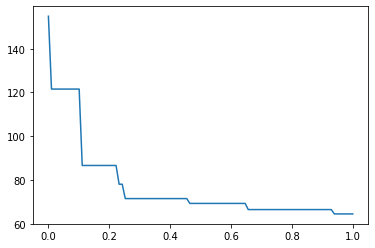

In [141]:
x = np.linspace(0, 1, maxit+1)
plt.plot(x, bestFobj, label= 'f=Fobj')
plt.show()

### Genetic Algorithm

In [142]:
import numpy as np
import random
from array import *
import matplotlib.pyplot as plt
import statistics as st
import math 

In [143]:
N = 3
rows, cols = (N, 4)
induk = [[0 for i in range(cols)] for j in range(rows)]
print (induk)

N_Anak = 6
rows, cols = (N_Anak, 4)
anak = [[0 for i in range(cols)] for j in range(rows)]
print(anak)


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [144]:
#Inisialiasi Parameter
Pc = 0.9
Pm = 0.1

for i in range(N):
    a = random.randint(0, 15)
    induk[i] = [int (x) for x in '{:04b}'.format(a)]
    print(a, induk[i])


8 [1, 0, 0, 0]
0 [0, 0, 0, 0]
4 [0, 1, 0, 0]


In [145]:
#Function cross over
def crossover(ind1=[], ind2=[]):
    anak1 = [0, 0, 0, 0]
    anak2 = [0, 0, 0, 0]
    
    
    anak1[0] = ind1[0]
    anak1[1] = ind1[1]
    anak1[2] = ind2[2]
    anak1[3] = ind2[3]
    
    anak2[0] = ind2[0]
    anak2[1] = ind2[1]
    anak2[2] = ind1[2]
    anak2[3] = ind1[3]
    
    return anak1, anak2


In [146]:
#Function  mutasi
def mutasi(ind=[]):
    ind[1] = 1 - ind[1]
    return ind


In [147]:
#Function hitung Int
def hitungInt(ind = []):
    a = ind[3] * 1
    a = a + ind[2] * 2
    a = a + ind[1] * 4
    a = a + ind[0] * 8
    return a


In [148]:
#Buat function untuk melakukan hitung fitness
def hitungFitness(ind = []):
    a = hitungInt(ind)
    #y = a**2 #sphere
    #y = np.sum(np.abs(a)) + np.product(np.abs(a)) #schwefel 2.22
    #y = np.sum(100*(a+1)-(a))**2 + (a-1)**2 #Generalize rosenbrock
    y = np.sum( (a**2) - (10*math.cos(2*math.pi*a)) + 10 ) #rastrigins

    return y

In [149]:
i = 1
#epochs = 495
epochs = 99
MaxFitness = [0 for i in range(epochs)] 
angkaFitness = [0 for i in range(epochs)]

#nilai fitness induk
for j in range(N):
    if (hitungFitness(induk[j])>MaxFitness[0]):
        MaxFitness[0] = hitungFitness(induk[j])


In [150]:
#'epochs' kali
for i in range(30):
  while i < epochs:
    print("Iterasi: ", i+1)   
    #Reproduksi 
    a = random.random()
    if (a<Pc):
        #Cross over
        anak[0], anak[1] = crossover(induk[0], induk[1])
        anak[2], anak[3] = crossover(induk[0], induk[2])
        anak[4], anak[5] = crossover(induk[1], induk[2])
    else:
        #Mutasi
        for j in range(N):
            induk [j] = mutasi(induk[j])
    #Elistism
    minFitness = 5.12
    idx = 0
    idxanak = 0
    #minFitness (induk terburuk)
    for j in range(len(induk)):
        if (hitungFitness(induk[j])<minFitness):
            minFitness = hitungFitness(induk[j])
            idx = j
    
    #cari maxFit (Anak terbaik)
    maxFit = -5.12
    for j in range(len(anak)):
        if (hitungFitness(anak[j])>maxFit):
            maxFit = hitungFitness(anak[j])
            idxanak = j
    #Individual replacement
    if (minFitness < maxFit):
        induk[idx] = anak[idxanak]
    
    #Populasi induk yang paling baik
    for j in range(N):
        if (hitungFitness(induk[j])>MaxFitness[i]):
            MaxFitness[i] = hitungFitness(induk[j])
    i+=1
    
    print(MaxFitness)

Streaming output truncated to the last 5000 lines.
Iterasi:  36
[64.0, 64.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 64.0, 64.0, 64.0, 64.0, 64.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Iterasi:  37
[64.0, 64.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 64.0, 64.0, 64.0, 64.0, 64.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Iterasi:  38
[64.0, 64.0, 144.0, 144.0, 144.0, 14

In [151]:
print("Nilai Mean : ", st.mean(MaxFitness))
print("Nilai Standard Deviation : ", st.stdev(MaxFitness))
print("Nilai Minimal : ",np.min(MaxFitness))

Nilai Mean :  143.1919191919192
Nilai Standard Deviation :  8.040302522073697
Nilai Minimal :  64.0


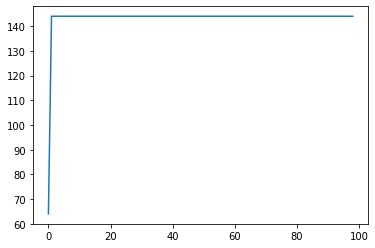

In [152]:
x = [i for i in range(epochs)] 
plt.plot(x, MaxFitness)  